In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [5]:
import datajoint as dj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

In [3]:
from workflow.pipeline import ephys

[2024-05-29 19:18:28,187][INFO]: Connecting milagros@db.datajoint.com:3306
[2024-05-29 19:18:29,691][INFO]: Connected milagros@db.datajoint.com:3306


In [31]:
key_1 = {
    "organoid_id": "O09",
    "experiment_start_time": datetime.datetime(2023, 5, 18, 12, 25),
    "insertion_number": 0,
    "start_time": datetime.datetime(2023, 5, 18, 12, 52),
    "end_time": datetime.datetime(2023, 5, 18, 12, 57),
    "paramset_idx": 1,
}

These are all the available SpikeInterface quality metrics contained in both `Cluster` and `Waveform` tables:


In [7]:
qm_query = ephys.QualityMetrics.Cluster * ephys.QualityMetrics.Waveform & key_1
qm_query

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,firing_rate (Hz) firing rate for a unit,snr signal-to-noise ratio for a unit,presence_ratio fraction of time in which spikes are present,isi_violation rate of ISI violation as a fraction of overall rate,number_violation total number of ISI violations,amplitude_cutoff estimate of miss rate based on amplitude histogram,isolation_distance distance to nearest cluster in Mahalanobis space,l_ratio,d_prime Classification accuracy based on LDA,nn_hit_rate Fraction of neighbors for target cluster that are also in target cluster,nn_miss_rate Fraction of neighbors outside target cluster that are in target cluster,silhouette_score Standard metric for cluster overlap,max_drift Maximum change in spike depth throughout recording,cumulative_drift Cumulative change in spike depth throughout recording,contamination_rate,amplitude (uV) absolute difference between waveform peak and trough,duration (ms) time between waveform peak and trough,halfwidth (ms) spike width at half max amplitude,pt_ratio absolute amplitude of peak divided by absolute amplitude of trough relative to 0,repolarization_slope the repolarization slope was defined by fitting a regression line to the first 30us from trough to peak,recovery_slope the recovery slope was defined by fitting a regression line to the first 30us from peak to tail,spread (um) the range with amplitude above 12-percent of the maximum amplitude along the probe,velocity_above (s/m) inverse velocity of waveform propagation from the soma toward the top of the probe,velocity_below (s/m) inverse velocity of waveform propagation from the soma toward the bottom of the probe
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,0,2.30667,1.2885,0.2,10.6502,51,0.000973378,12.449,1.64799,1.29422,0.2805,0.10925,0.0222725,nan,nan,1.0,-5.85,0.000685,0.000315,-0.411953,25892.7,1179.48,100.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,1,33.3633,2.3939,1.0,0.529047,530,0.00348457,37.2572,0.0871587,4.49079,0.861,0.005,0.183148,0.0,0.0,1.0,-13.845,0.00072,0.00028,-0.348707,40014.5,-6507.14,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,2,34.99,2.34152,1.0,0.430178,474,0.0055664,34.9269,0.129357,4.32139,0.837,0.00625,0.182643,0.0,0.0,0.75924,-14.82,0.000895,0.000425,-0.498894,33773.1,-10272.3,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,3,26.28,2.43663,1.0,0.440816,274,0.000128012,40.0324,0.10139,4.29865,0.8455,0.00725,0.177694,0.0,0.0,0.687825,-12.48,0.00069,0.00029,-0.360042,36676.4,-4541.49,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,4,32.5667,2.54148,1.0,0.490294,468,0.00016529,40.0109,0.084482,4.52959,0.8575,0.003,0.193257,0.0,0.0,0.748182,-14.04,0.00078,0.000245,-0.314915,41397.5,-5936.28,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,5,37.56,2.30099,1.0,0.345757,439,0.0188273,39.6281,0.0794419,4.4497,0.877,0.0045,0.198326,0.0,0.0,0.520702,-14.625,0.0009,0.00045,-0.566018,37079.9,-9840.2,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,6,25.91,2.59274,1.0,0.514734,311,0.000657147,49.4647,0.0382585,4.85431,0.877,0.00525,0.187222,0.0,0.0,0.637956,-13.26,0.000855,0.00017,-0.248068,43918.6,-5732.27,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,7,36.2767,2.25256,1.0,0.390916,463,0.00227223,119.78,0.0130779,4.78618,0.9525,0.045,0.253457,0.0,0.0,0.542043,-11.31,0.000705,0.0004,-0.436306,25917.0,-5381.14,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,8,32.5133,2.42762,1.0,0.442503,421,0.000315298,41.165,0.084976,4.57834,0.8585,0.004,0.18959,0.0,0.0,0.686669,-13.65,0.000705,0.00023,-0.289083,46777.1,-5476.35,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,9,30.9167,2.44056,1.0,0.512638,441,0.000349729,95.8882,0.0181679,4.517

## Establishing threshold criteria: Initial setup for filtering metrics


The criteria presented in this notebook serves as an illustration of querying using one or more thresholds in the Quality Metrics.

The aim is to use this initial setup as a foundation for exploring additional criteria tailored to your specific experiments.


Example of unit restriction criteria based on brain regions:


In [8]:
brain_area_unit_restrictions = {
    "Medulla":
    # "amplitude > 150 "
    "firing_rate > 0.2 "
    "AND presence_ratio > 0.9 "
    "AND isi_violation < 10 "
    "AND amplitude_cutoff < 0.15",
    "ALM":
    # "amplitude > 100 "
    "firing_rate > 0.2 "
    "AND presence_ratio > 0.95 "
    "AND isi_violation < 0.1 "
    "AND amplitude_cutoff < 0.1",
    "Midbrain":
    # "amplitude > 100 "
    "firing_rate > 0.1 "
    "AND presence_ratio > 0.9 "
    "AND isi_violation < 1 "
    "AND amplitude_cutoff < 0.08",
    "Thalamus":
    # "amplitude > 90 "
    "firing_rate > 0.1 "
    "AND presence_ratio > 0.9 "
    "AND isi_violation < 0.05 "
    "AND amplitude_cutoff < 0.08",
    "Striatum":
    # "amplitude > 70 "
    "firing_rate > 0.1 "
    "AND presence_ratio > 0.9 "
    "AND isi_violation < 0.5 "
    "AND amplitude_cutoff < 0.1",
}

In [9]:
qm_query & brain_area_unit_restrictions["Medulla"]

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,firing_rate (Hz) firing rate for a unit,snr signal-to-noise ratio for a unit,presence_ratio fraction of time in which spikes are present,isi_violation rate of ISI violation as a fraction of overall rate,number_violation total number of ISI violations,amplitude_cutoff estimate of miss rate based on amplitude histogram,isolation_distance distance to nearest cluster in Mahalanobis space,l_ratio,d_prime Classification accuracy based on LDA,nn_hit_rate Fraction of neighbors for target cluster that are also in target cluster,nn_miss_rate Fraction of neighbors outside target cluster that are in target cluster,silhouette_score Standard metric for cluster overlap,max_drift Maximum change in spike depth throughout recording,cumulative_drift Cumulative change in spike depth throughout recording,contamination_rate,amplitude (uV) absolute difference between waveform peak and trough,duration (ms) time between waveform peak and trough,halfwidth (ms) spike width at half max amplitude,pt_ratio absolute amplitude of peak divided by absolute amplitude of trough relative to 0,repolarization_slope the repolarization slope was defined by fitting a regression line to the first 30us from trough to peak,recovery_slope the recovery slope was defined by fitting a regression line to the first 30us from peak to tail,spread (um) the range with amplitude above 12-percent of the maximum amplitude along the probe,velocity_above (s/m) inverse velocity of waveform propagation from the soma toward the top of the probe,velocity_below (s/m) inverse velocity of waveform propagation from the soma toward the bottom of the probe
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,1,33.3633,2.3939,1.0,0.529047,530,0.00348457,37.2572,0.0871587,4.49079,0.861,0.005,0.183148,0.0,0.0,1.0,-13.845,0.00072,0.00028,-0.348707,40014.5,-6507.14,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,2,34.99,2.34152,1.0,0.430178,474,0.0055664,34.9269,0.129357,4.32139,0.837,0.00625,0.182643,0.0,0.0,0.75924,-14.82,0.000895,0.000425,-0.498894,33773.1,-10272.3,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,3,26.28,2.43663,1.0,0.440816,274,0.000128012,40.0324,0.10139,4.29865,0.8455,0.00725,0.177694,0.0,0.0,0.687825,-12.48,0.00069,0.00029,-0.360042,36676.4,-4541.49,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,4,32.5667,2.54148,1.0,0.490294,468,0.00016529,40.0109,0.084482,4.52959,0.8575,0.003,0.193257,0.0,0.0,0.748182,-14.04,0.00078,0.000245,-0.314915,41397.5,-5936.28,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,5,37.56,2.30099,1.0,0.345757,439,0.0188273,39.6281,0.0794419,4.4497,0.877,0.0045,0.198326,0.0,0.0,0.520702,-14.625,0.0009,0.00045,-0.566018,37079.9,-9840.2,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,6,25.91,2.59274,1.0,0.514734,311,0.000657147,49.4647,0.0382585,4.85431,0.877,0.00525,0.187222,0.0,0.0,0.637956,-13.26,0.000855,0.00017,-0.248068,43918.6,-5732.27,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,7,36.2767,2.25256,1.0,0.390916,463,0.00227223,119.78,0.0130779,4.78618,0.9525,0.045,0.253457,0.0,0.0,0.542043,-11.31,0.000705,0.0004,-0.436306,25917.0,-5381.14,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,8,32.5133,2.42762,1.0,0.442503,421,0.000315298,41.165,0.084976,4.57834,0.8585,0.004,0.18959,0.0,0.0,0.686669,-13.65,0.000705,0.00023,-0.289083,46777.1,-5476.35,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,9,30.9167,2.44056,1.0,0.512638,441,0.000349729,95.8882,0.0181679,4.51755,0.9485,0.0425,0.256099,0.0,0.0,1.0,-14.43,0.000785,0.000285,-0.377473,40888.1,-8110.63,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,10,31.76,2.47107,1.0,0.404262,367,0.00393261,39.4938,0.0830718,4.5

In [10]:
qm_query & brain_area_unit_restrictions["ALM"]

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,firing_rate (Hz) firing rate for a unit,snr signal-to-noise ratio for a unit,presence_ratio fraction of time in which spikes are present,isi_violation rate of ISI violation as a fraction of overall rate,number_violation total number of ISI violations,amplitude_cutoff estimate of miss rate based on amplitude histogram,isolation_distance distance to nearest cluster in Mahalanobis space,l_ratio,d_prime Classification accuracy based on LDA,nn_hit_rate Fraction of neighbors for target cluster that are also in target cluster,nn_miss_rate Fraction of neighbors outside target cluster that are in target cluster,silhouette_score Standard metric for cluster overlap,max_drift Maximum change in spike depth throughout recording,cumulative_drift Cumulative change in spike depth throughout recording,contamination_rate,amplitude (uV) absolute difference between waveform peak and trough,duration (ms) time between waveform peak and trough,halfwidth (ms) spike width at half max amplitude,pt_ratio absolute amplitude of peak divided by absolute amplitude of trough relative to 0,repolarization_slope the repolarization slope was defined by fitting a regression line to the first 30us from trough to peak,recovery_slope the recovery slope was defined by fitting a regression line to the first 30us from peak to tail,spread (um) the range with amplitude above 12-percent of the maximum amplitude along the probe,velocity_above (s/m) inverse velocity of waveform propagation from the soma toward the top of the probe,velocity_below (s/m) inverse velocity of waveform propagation from the soma toward the bottom of the probe


In [11]:
qm_query & brain_area_unit_restrictions["Midbrain"]

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,firing_rate (Hz) firing rate for a unit,snr signal-to-noise ratio for a unit,presence_ratio fraction of time in which spikes are present,isi_violation rate of ISI violation as a fraction of overall rate,number_violation total number of ISI violations,amplitude_cutoff estimate of miss rate based on amplitude histogram,isolation_distance distance to nearest cluster in Mahalanobis space,l_ratio,d_prime Classification accuracy based on LDA,nn_hit_rate Fraction of neighbors for target cluster that are also in target cluster,nn_miss_rate Fraction of neighbors outside target cluster that are in target cluster,silhouette_score Standard metric for cluster overlap,max_drift Maximum change in spike depth throughout recording,cumulative_drift Cumulative change in spike depth throughout recording,contamination_rate,amplitude (uV) absolute difference between waveform peak and trough,duration (ms) time between waveform peak and trough,halfwidth (ms) spike width at half max amplitude,pt_ratio absolute amplitude of peak divided by absolute amplitude of trough relative to 0,repolarization_slope the repolarization slope was defined by fitting a regression line to the first 30us from trough to peak,recovery_slope the recovery slope was defined by fitting a regression line to the first 30us from peak to tail,spread (um) the range with amplitude above 12-percent of the maximum amplitude along the probe,velocity_above (s/m) inverse velocity of waveform propagation from the soma toward the top of the probe,velocity_below (s/m) inverse velocity of waveform propagation from the soma toward the bottom of the probe
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,1,33.3633,2.3939,1.0,0.529047,530,0.00348457,37.2572,0.0871587,4.49079,0.861,0.005,0.183148,0.0,0.0,1.0,-13.845,0.00072,0.00028,-0.348707,40014.5,-6507.14,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,2,34.99,2.34152,1.0,0.430178,474,0.0055664,34.9269,0.129357,4.32139,0.837,0.00625,0.182643,0.0,0.0,0.75924,-14.82,0.000895,0.000425,-0.498894,33773.1,-10272.3,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,3,26.28,2.43663,1.0,0.440816,274,0.000128012,40.0324,0.10139,4.29865,0.8455,0.00725,0.177694,0.0,0.0,0.687825,-12.48,0.00069,0.00029,-0.360042,36676.4,-4541.49,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,4,32.5667,2.54148,1.0,0.490294,468,0.00016529,40.0109,0.084482,4.52959,0.8575,0.003,0.193257,0.0,0.0,0.748182,-14.04,0.00078,0.000245,-0.314915,41397.5,-5936.28,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,5,37.56,2.30099,1.0,0.345757,439,0.0188273,39.6281,0.0794419,4.4497,0.877,0.0045,0.198326,0.0,0.0,0.520702,-14.625,0.0009,0.00045,-0.566018,37079.9,-9840.2,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,6,25.91,2.59274,1.0,0.514734,311,0.000657147,49.4647,0.0382585,4.85431,0.877,0.00525,0.187222,0.0,0.0,0.637956,-13.26,0.000855,0.00017,-0.248068,43918.6,-5732.27,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,7,36.2767,2.25256,1.0,0.390916,463,0.00227223,119.78,0.0130779,4.78618,0.9525,0.045,0.253457,0.0,0.0,0.542043,-11.31,0.000705,0.0004,-0.436306,25917.0,-5381.14,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,8,32.5133,2.42762,1.0,0.442503,421,0.000315298,41.165,0.084976,4.57834,0.8585,0.004,0.18959,0.0,0.0,0.686669,-13.65,0.000705,0.00023,-0.289083,46777.1,-5476.35,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,9,30.9167,2.44056,1.0,0.512638,441,0.000349729,95.8882,0.0181679,4.51755,0.9485,0.0425,0.256099,0.0,0.0,1.0,-14.43,0.000785,0.000285,-0.377473,40888.1,-8110.63,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,10,31.76,2.47107,1.0,0.404262,367,0.00393261,39.4938,0.0830718,4.5

In [12]:
qm_query & brain_area_unit_restrictions["Thalamus"]

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,firing_rate (Hz) firing rate for a unit,snr signal-to-noise ratio for a unit,presence_ratio fraction of time in which spikes are present,isi_violation rate of ISI violation as a fraction of overall rate,number_violation total number of ISI violations,amplitude_cutoff estimate of miss rate based on amplitude histogram,isolation_distance distance to nearest cluster in Mahalanobis space,l_ratio,d_prime Classification accuracy based on LDA,nn_hit_rate Fraction of neighbors for target cluster that are also in target cluster,nn_miss_rate Fraction of neighbors outside target cluster that are in target cluster,silhouette_score Standard metric for cluster overlap,max_drift Maximum change in spike depth throughout recording,cumulative_drift Cumulative change in spike depth throughout recording,contamination_rate,amplitude (uV) absolute difference between waveform peak and trough,duration (ms) time between waveform peak and trough,halfwidth (ms) spike width at half max amplitude,pt_ratio absolute amplitude of peak divided by absolute amplitude of trough relative to 0,repolarization_slope the repolarization slope was defined by fitting a regression line to the first 30us from trough to peak,recovery_slope the recovery slope was defined by fitting a regression line to the first 30us from peak to tail,spread (um) the range with amplitude above 12-percent of the maximum amplitude along the probe,velocity_above (s/m) inverse velocity of waveform propagation from the soma toward the top of the probe,velocity_below (s/m) inverse velocity of waveform propagation from the soma toward the bottom of the probe


In [13]:
striatum_keys = (qm_query & brain_area_unit_restrictions["Striatum"]).fetch("KEY")

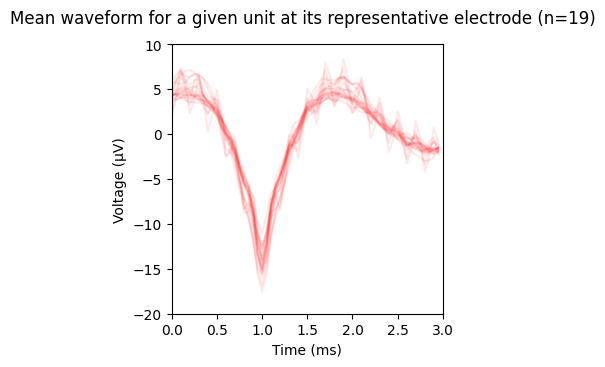

In [17]:
peak_wfs = (ephys.WaveformSet.PeakWaveform & striatum_keys).fetch(
    "peak_electrode_waveform"
)
sample_rate = (ephys.EphysSessionInfo & striatum_keys).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Mean waveform for a given unit at its representative electrode (n={len(striatum_keys)})"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

##


## Waverform post-analysis


The following section is focused on reproducing the post-analysis of waveforms, as presented in Extended Data Fig. 8 from:

Yang, X., Forró, C., Li, T. L., Miura, Y., Zaluska, T. J., Tsai, C. T., ... & Cui, B. (2024). Kirigami electronics for long-term electrophysiological recording of human neural organoids and assembloids. Nature Biotechnology, 1-8.


In [18]:
# pip install umap-learn[plot] in your conda environment
import umap
from sklearn.cluster import DBSCAN

In [19]:
(ephys.WaveformSet.PeakWaveform & key_1)

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,peak_electrode_waveform (uV) mean waveform for a given unit at its representative electrode
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,0,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,1,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,2,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,3,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,4,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,5,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,6,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,7,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,8,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:52:00,2023-05-18 12:57:00,1,9,=BLOB=


In [20]:
ephys.EphysSessionInfo.heading

# Store header information from the first session file.
organoid_id          : varchar(4)                   # e.g. O17
experiment_start_time : datetime                     # 
insertion_number     : tinyint unsigned             # 
start_time           : datetime                     # 
end_time             : datetime                     # 
---
session_info         : longblob                     # Session header info from intan .rhd file. Get this from the first session file.

In [21]:
session_info = (ephys.EphysSessionInfo & key_1).fetch1("session_info")
session_info

{'version': {'major': 3, 'minor': 2},
 'sample_rate': 20000.0,
 'notch_filter_frequency': 60,
 'notes': {'note1': '', 'note2': '', 'note3': ''},
 'num_temp_sensor_channels': 0,
 'eval_board_mode': 13,
 'num_samples_per_data_block': 128,
 'reference_channel': 'n/a',
 'frequency_parameters': {'dsp_enabled': 1,
  'actual_dsp_cutoff_frequency': 0.7772186398506165,
  'actual_lower_bandwidth': 0.09452909976243973,
  'actual_upper_bandwidth': 7603.76513671875,
  'desired_dsp_cutoff_frequency': 1.0,
  'desired_lower_bandwidth': 0.10000000149011612,
  'desired_upper_bandwidth': 7500.0,
  'notch_filter_frequency': 60,
  'desired_impedance_test_frequency': 1000.0,
  'actual_impedance_test_frequency': 1000.0,
  'amplifier_sample_rate': 20000.0,
  'aux_input_sample_rate': 5000.0,
  'supply_voltage_sample_rate': 156.25,
  'board_adc_sample_rate': 20000.0,
  'board_dig_in_sample_rate': 20000.0},
 'amplifier_channels': [{'port_name': 'Port A',
   'port_prefix': 'A',
   'port_number': 1,
   'native_cha

In [32]:
# Get waveform
unit = 1

(ephys.WaveformSet.PeakWaveform & key_1 & f"unit={unit}").fetch1(
    "peak_electrode_waveform"
)

array([  4.02050877,   4.3835988 ,   4.751369  ,   4.65309   ,
         4.17378044,   4.07471991,   4.60745907,   4.73615789,
         4.05833912,   3.14222956,   2.18595004,   1.1661005 ,
         0.13805997,  -0.58187997,  -1.69727874,  -3.72099113,
        -5.58752871,  -6.81759071,  -8.59209156, -11.7538147 ,
       -13.84188557, -12.46050453,  -8.7488718 ,  -5.9829874 ,
        -4.7689209 ,  -3.52911067,  -1.71560991,  -0.23985006,
         0.9987902 ,   2.16956902,   3.13208914,   3.26780987,
         3.37856793,   3.99359965,   4.71899796,   4.73459959,
         4.43546867,   4.57703972,   4.66049767,   4.26426029,
         3.57434964,   3.57591033,   3.63830829,   3.00924134,
         2.35677075,   2.01044869,   1.70741892,   1.05533969,
         0.41105995,   0.10139995,  -0.18095995,  -0.64154989,
        -1.20353997,  -1.36032045,  -1.36382949,  -1.32054019,
        -1.27295995,  -1.56545949,  -1.69104075,  -1.38996089])

In [30]:
# Plot the waveform and auto-correlogram
from element_array_ephys.plotting.unit_level import (
    plot_auto_correlogram,
    plot_waveform,
)

sampling_rate = (ephys.EphysSessionInfo & key_1).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz

peak_electrode_waveform, spike_times, cluster_quality_label = (
    (ephys.CuratedClustering.Unit & key_1 & f"unit={unit}")
    * ephys.WaveformSet.PeakWaveform
).fetch1("peak_electrode_waveform", "spike_times", "cluster_quality_label")

# Get the figure
waveform_fig = plot_waveform(
    waveform=peak_electrode_waveform, sampling_rate=sampling_rate
)

correlogram_fig = plot_auto_correlogram(
    spike_times=spike_times, bin_size=0.001, window_size=1
)

display(waveform_fig)
display(correlogram_fig)

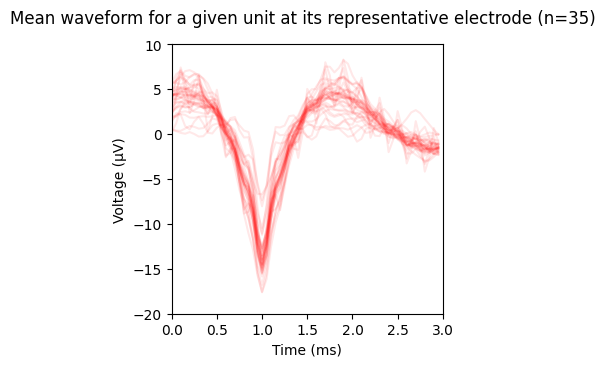

In [34]:
peak_wfs = (ephys.WaveformSet.PeakWaveform & key_1).fetch("peak_electrode_waveform")
sample_rate = (ephys.EphysSessionInfo & key_1).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Mean waveform for a given unit at its representative electrode (n={len(peak_wfs)})"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

UMAP dimensionality reduction is performed on every signal into two components. Density based clustering (DBSCAN) is performed on the component space. Each detected cluster corresponds to a given signal waveform.


In [44]:
peak_wf_vs = np.vstack(peak_wfs)
embedding = umap.UMAP(n_neighbors=5, min_dist=0.25, metric="correlation").fit_transform(
    peak_wf_vs
)

Use of the DBSCAN function to extract the clustering labels:


In [45]:
clustering = DBSCAN(eps=3, min_samples=2).fit(embedding)

Plot the results


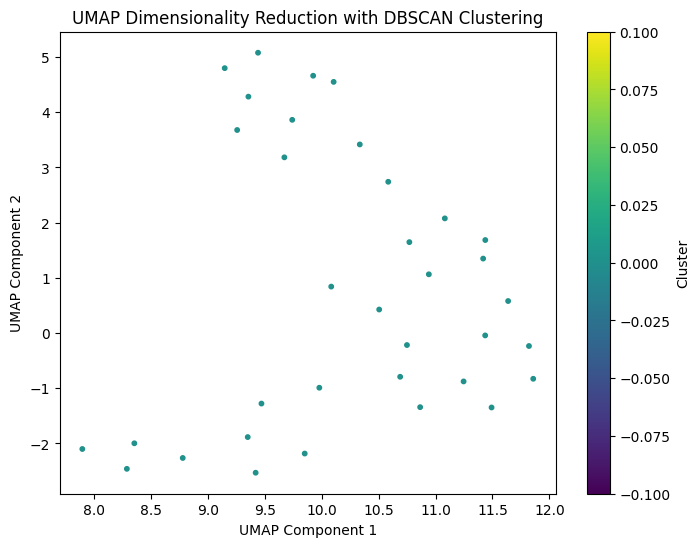

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(
    embedding[:, 0], embedding[:, 1], c=clustering.labels_, cmap="viridis", s=10
)
plt.colorbar(label="Cluster")
plt.title("UMAP Dimensionality Reduction with DBSCAN Clustering")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

Let's select one of the clusters:


In [47]:
target_cluster_label = 0

Representative spikes are presented by averaging all the signals belonging to a given cluster:


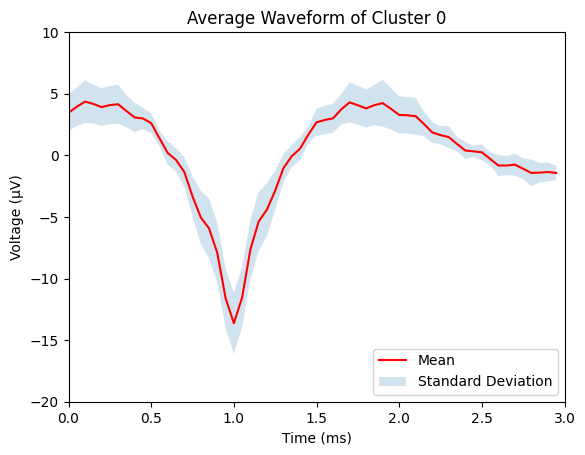

In [53]:
cluster_indices = np.where(clustering.labels_ == target_cluster_label)[0]
target_cluster_data = peak_wf_vs[cluster_indices]
mean_cluster = np.mean(target_cluster_data, axis=0)
std_cluster = np.std(target_cluster_data, axis=0)
cluster_timestamps = np.arange(len(mean_cluster)) / sample_rate

plt.plot(cluster_timestamps, mean_cluster, color="red", label="Mean")
plt.fill_between(
    cluster_timestamps,
    mean_cluster - std_cluster,
    mean_cluster + std_cluster,
    alpha=0.2,
    label="Standard Deviation",
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.title("Average Waveform of Cluster {}".format(target_cluster_label))
plt.legend(loc="lower right")
plt.show()